In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import datetime

In [35]:
%store -r pca
%store -r pca_data
%store -r Xnorm

In [36]:
Xnorm

array([[1.        , 0.049999  , 0.54545455, ..., 0.05050531, 0.41899759,
        0.        ],
       [0.5       , 0.08717059, 0.33333333, ..., 0.21276878, 0.27332692,
        0.06277469],
       [0.5       , 0.17569402, 0.33333333, ..., 0.05573387, 0.19530315,
        0.04882476],
       ...,
       [0.5       , 0.52708207, 0.33333333, ..., 0.13212041, 0.24931585,
        0.02789986],
       [1.        , 0.1093625 , 0.42424242, ..., 0.02086691, 0.33481831,
        0.        ],
       [0.        , 0.01885724, 0.60606061, ..., 0.19411935, 0.37084684,
        0.202274  ]])

In [26]:
X=pca_data[['PC1','PC2']].to_numpy()
y_res=pca_data[['cluster']]

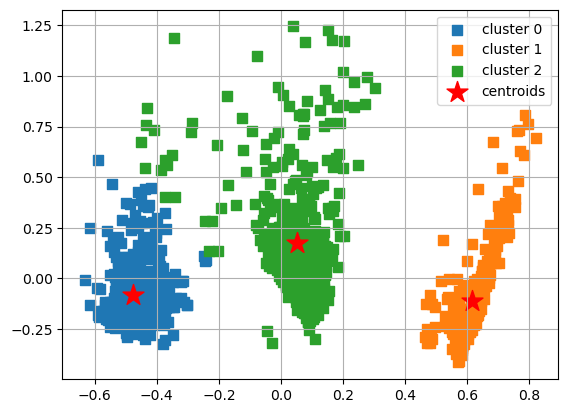

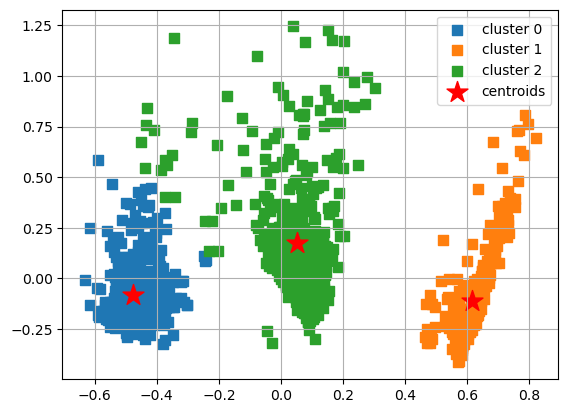

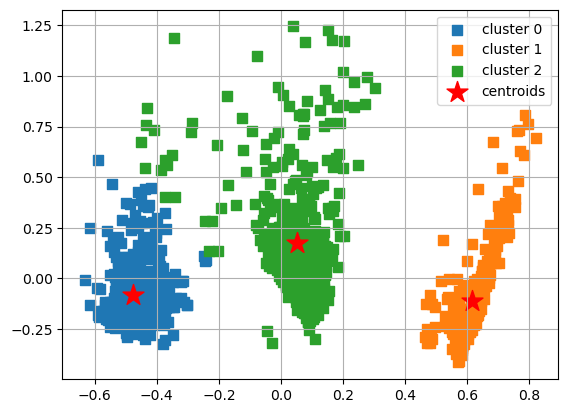

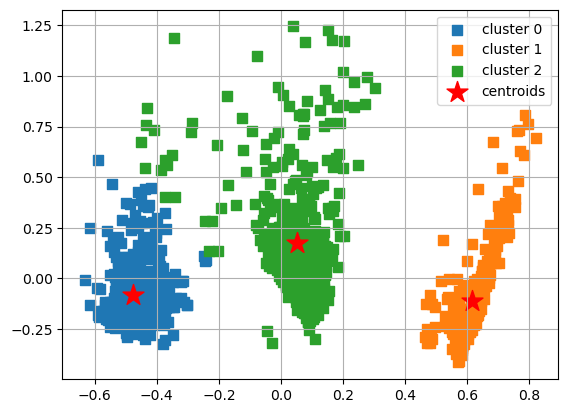

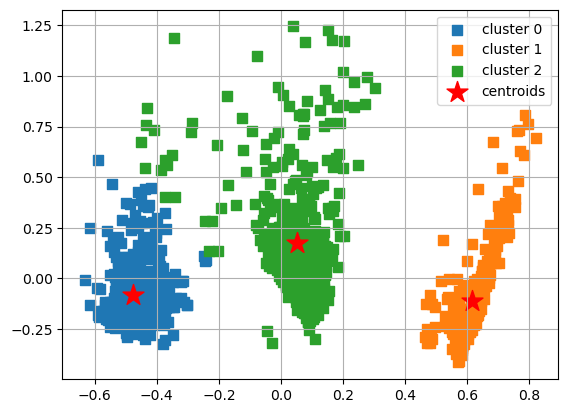

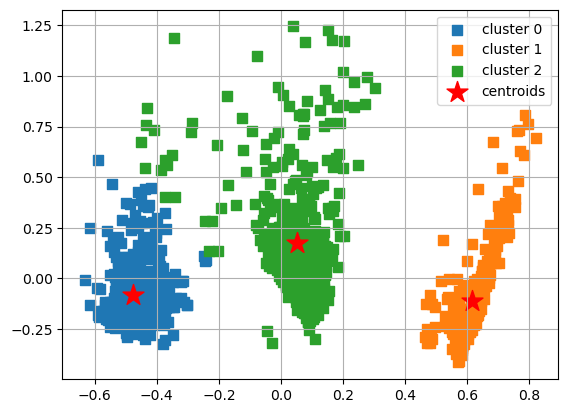

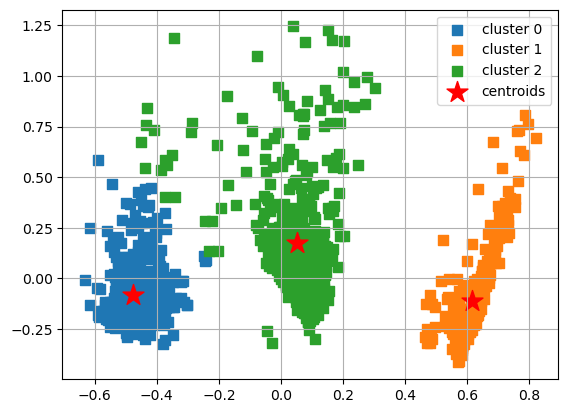

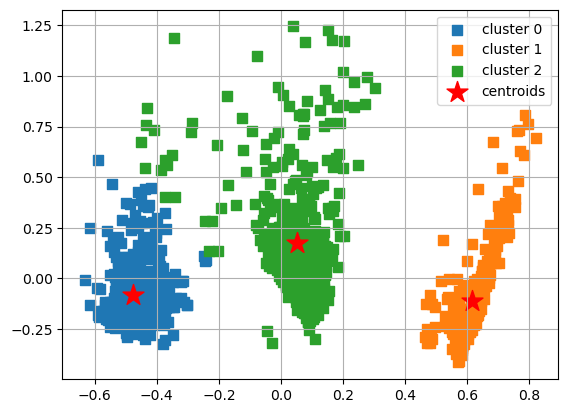

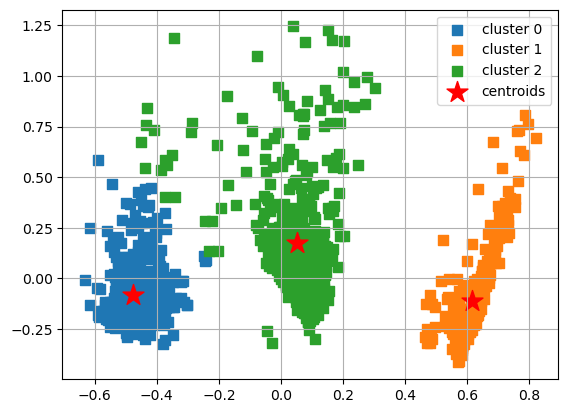

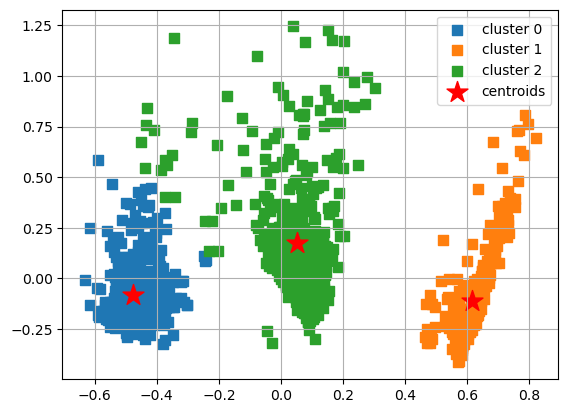

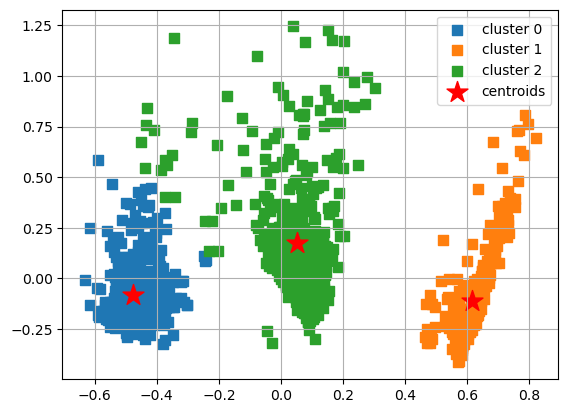

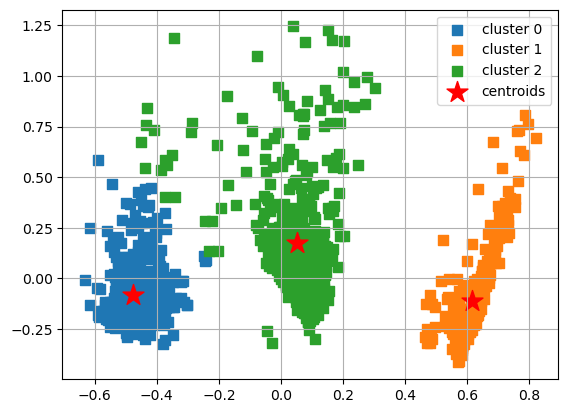

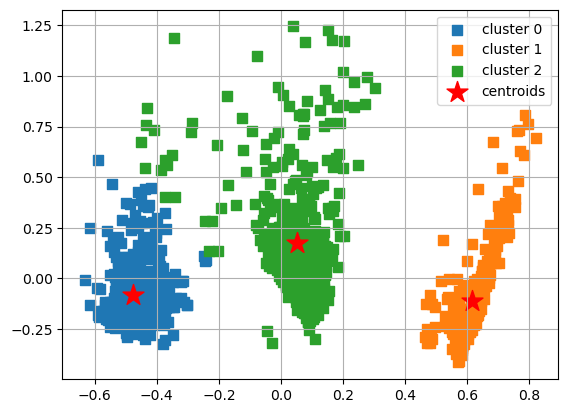

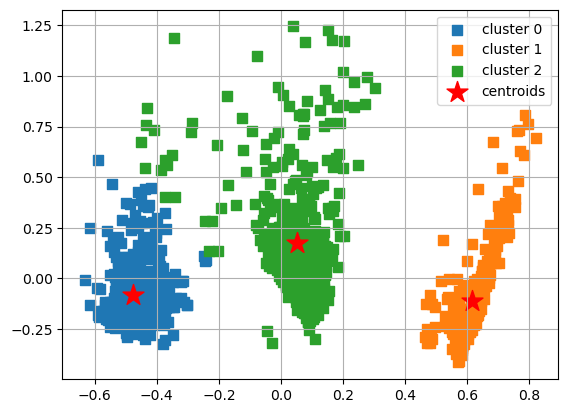

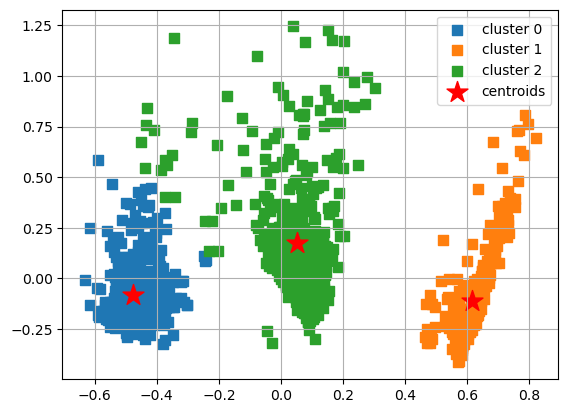

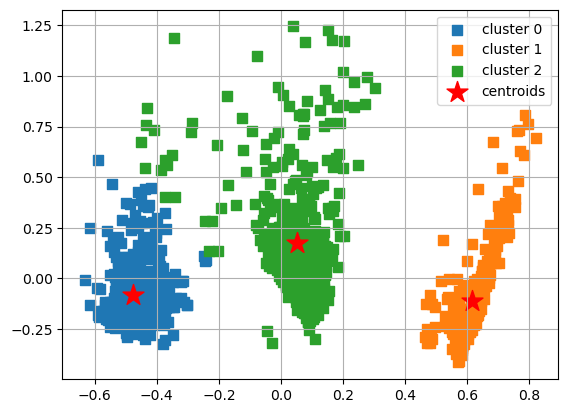

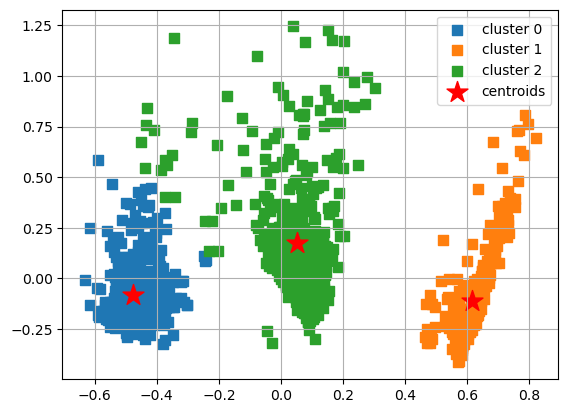

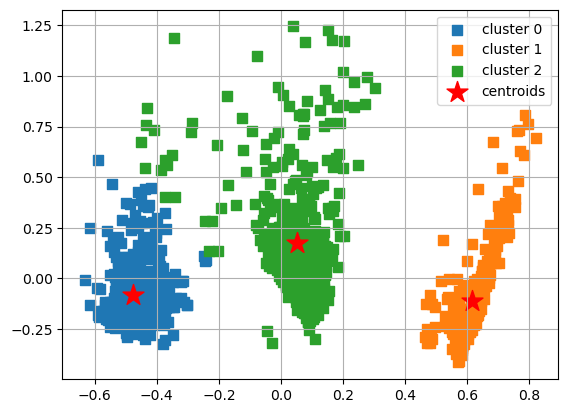

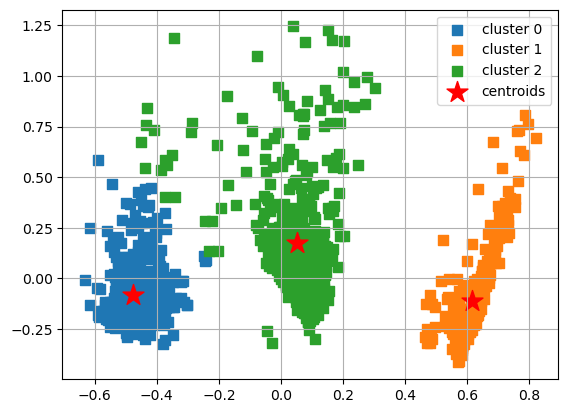

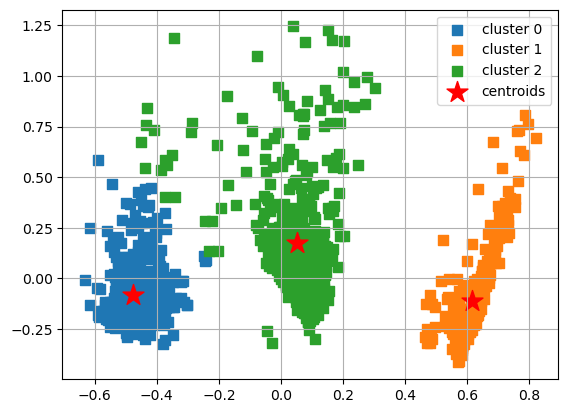

In [33]:
for i in range(1,21):
    kmeans =KMeans(n_clusters=3 , n_init=i, random_state=2023).fit(Xnorm)
    y_km=kmeans.fit_predict(X)
    #pca_data['cluster'] = pd.Categorical(kmeans.labels_)
    #sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
   
    
    def plot_clusters(X,y_res, plt_cluster_centers = False):
        X_centroids = []
        Y_centroids = []

        for cluster in set(y_res):
            x = X[y_res == cluster,0]
            y = X[y_res == cluster,1]
            X_centroids.append(np.mean(x))
            Y_centroids.append(np.mean(y))

            plt.scatter(x,
                        y,
                        s=50,
                        marker='s',
                        label=f'cluster {cluster}')

        if plt_cluster_centers:
            plt.scatter(X_centroids,
                        Y_centroids,
                        marker='*',
                        c='red',
                        s=250,
                        label='centroids')
        plt.legend()
        plt.grid()
        plt.show()
    plot_clusters(X, y_km, plt_cluster_centers= True)